In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("MMM Dataset.xlsx");

In [9]:
df.head()

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
0,TV Manufacturing & Supplier Unit,2010-01-01,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
1,TV Manufacturing & Supplier Unit,2010-01-02,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364
2,TV Manufacturing & Supplier Unit,2010-01-03,4006,104.9,96.3,106.7,361.62,4206,1520973.72,80.6093,13.200691,108.7702,1428.0645,653.333,113.090,0.0000,94.6364,282.7273,751.9545
3,TV Manufacturing & Supplier Unit,2010-01-04,4076,104.9,96.3,106.7,361.62,4176,1510125.12,65.9319,12.721429,93.3065,1309.3548,622.095,72.442,0.0000,98.5909,306.3182,749.4545
4,TV Manufacturing & Supplier Unit,2010-01-05,4834,104.9,96.3,106.7,361.62,5234,1892719.08,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909


In [47]:
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

In [42]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

TV Manufacturing Brand                      0
DATE                                        0
DEMAND                                      0
Consumer Price Index (CPI)                  0
Consumer Confidence Index(CCI)              0
Producer Price Index (PPI)                  0
Unit Price ($)                              0
POS/ Supply Data                            0
SALES ($)                                   0
Advertising Expenses (SMS)                  0
Advertising Expenses(Newspaper ads)         0
Advertising Expenses(Radio)                 0
Advertising Expenses(TV)                    0
Advertising Expenses(Internet)              0
GRP (NewPaper ads)                          0
GRP(SMS)                                    0
GRP(Radio                                   0
GRP(Internet)                               0
GRP(TV)                                     0
Advertising Expenses (SMS)_lag1             0
Advertising Expenses (SMS)_lag2             0
Advertising Expenses(Newspaper ads

In [48]:
# Handling missing values (if any, otherwise skip this step)
df.fillna(method='ffill', inplace=True)

In [7]:
df.describe()

,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
count,2613,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2.613000e+03,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000
mean,2013-07-30 00:00:00,5021.434367,102.609989,103.152315,102.238232,363.275128,4522.970915,1.641507e+06,60.388495,12.651179,88.074643,1324.501468,3079.184067,505.296876,30.618203,139.437260,286.228665,1146.114128
min,2010-01-01 00:00:00,1610.000000,101.300000,96.300000,99.500000,282.140000,1510.000000,4.627096e+05,37.916700,10.027128,62.968800,1067.155700,0.000000,5.659000,0.000000,66.863600,191.181800,697.636400
25%,2011-10-16 00:00:00,2436.000000,101.400000,102.700000,100.400000,361.600000,1776.000000,6.717679e+05,47.554100,11.885714,78.098100,1251.250000,2226.429000,114.957000,0.000000,95.136400,234.954500,849.545500
50%,2013-07-30 00:00:00,4636.000000,102.300000,103.600000,102.700000,361.620000,4412.000000,1.605095e+06,61.267900,13.186582,84.129200,1380.696200,3302.667000,221.528000,26.119600,109.636400,261.454500,928.545500
75%,2015-05-14 00:00:00,6834.000000,103.400000,104.600000,103.500000,361.620000,6266.000000,2.267206e+06,71.012200,13.437482,98.639000,1416.171400,4237.095000,854.310000,46.782000,126.045500,291.318200,1114.863600
max,2017-02-25 00:00:00,18565.000000,106.500000,107.900000,107.200000,400.100000,16482.000000,5.960221e+06,89.728300,14.104193,118.467700,1479.456500,6354.571000,1791.183000,144.995100,1169.409100,1540.429400,7307.318200
std,NaN,2681.197808,1.381355,3.167221,2.037774,26.372958,2603.996535,9.416673e+05,13.557190,1.117926,12.569956,123.677327,1520.891014,488.147782,31.570754,146.042432,138.406620,822.991163


In [12]:
# Handling outliers using quantiles (removing extreme values)
for col in ['SALES ($)', 'Unit Price ($)', 'Advertising Expenses (SMS)', 'Advertising Expenses(Newspaper ads)',
            'Advertising Expenses(Radio)', 'Advertising Expenses(TV)', 'Advertising Expenses(Internet)']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [15]:
# Normalize continuous variables
scaler = StandardScaler()
cols_to_normalize = ['Unit Price ($)', 'Consumer Price Index (CPI)', 'Consumer Confidence Index(CCI)', 'Producer Price Index (PPI)', 'Advertising Expenses (SMS)', 'Advertising Expenses(Newspaper ads)',
                     'Advertising Expenses(Radio)', 'Advertising Expenses(TV)', 'Advertising Expenses(Internet)', 
                     'GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio', 'GRP(Internet)', 'GRP(TV)']

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df.head()

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
0,TV Manufacturing & Supplier Unit,2010-01-01,4384,1.323682,-2.162999,2.058255,0.587054,4240,1533268.80,1.278591,1.333267,1.931004,1.287260,-1.505875,-0.835682,-0.598400,-0.338307,-0.095254,-0.469895
1,TV Manufacturing & Supplier Unit,2010-01-02,4366,1.323682,-2.162999,2.058255,0.587054,4266,1542670.92,0.990298,0.630151,1.408943,0.422963,-1.508936,-0.795800,-0.089261,-0.201869,0.008415,-0.347772
2,TV Manufacturing & Supplier Unit,2010-01-03,4006,1.323682,-2.162999,2.058255,0.587054,4206,1520973.72,1.503789,0.544542,1.649879,0.881858,-1.550846,-0.799594,-0.976005,-0.314579,-0.051139,-0.475363
3,TV Manufacturing & Supplier Unit,2010-01-04,4076,1.323682,-2.162999,2.058255,0.587054,4176,1510125.12,0.446895,0.126163,0.431075,-0.054574,-1.571136,-0.882205,-0.976005,-0.288774,0.112400,-0.478311
4,TV Manufacturing & Supplier Unit,2010-01-05,4834,1.323682,-2.162999,2.058255,0.587054,5234,1892719.08,1.278591,1.333267,1.931004,1.287260,-1.505875,-0.835682,-0.598400,-0.338307,-0.095254,-0.469895


In [49]:
# Generate lagged variables (e.g., lagged advertising expenses for capturing delayed effects)
for col in ['Advertising Expenses (SMS)', 'Advertising Expenses(Newspaper ads)', 'Advertising Expenses(Radio)', 
            'Advertising Expenses(TV)', 'Advertising Expenses(Internet)']:
    df[col + '_lag1'] = df[col].shift(1)  # 1-period lag
df.fillna(0, inplace=True)

In [50]:
# Add time-related variables (e.g., month, seasonality)
df['month'] = df['DATE'].dt.month
df['day_of_week'] = df['DATE'].dt.dayofweek
df = pd.get_dummies(df, columns=['month', 'day_of_week'], drop_first=True)

In [51]:
# Define features (X) and target (y)
X = df.drop(columns=['SALES ($)', 'DATE', 'TV Manufacturing Brand'])
y = df['SALES ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model using R-squared
r_squared = lr.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

RMSE: 13.948914611195894
R-squared: 0.9999999996893513


In [53]:
# Media spend columns to calculate elasticity
media_spends_cols = ['Advertising Expenses (SMS)', 'Advertising Expenses(Newspaper ads)', 
                     'Advertising Expenses(Radio)', 'Advertising Expenses(TV)', 
                     'Advertising Expenses(Internet)']

In [54]:
# Calculate the average sales and media spends
average_sales = df['SALES ($)'].mean()
average_spends = df[media_spends_cols].mean()

# Extract coefficients from the linear regression model
coefficients = pd.Series(lr.coef_, index=X.columns)

# Calculate elasticity for each media spend channel
elasticity = {}
for media in media_spends_cols:
    elasticity[media] = (coefficients[media] / average_sales) * average_spends[media]

# Convert elasticity to a Pandas Series for easier viewing
elasticity = pd.Series(elasticity)

# Display the elasticities
print("Elasticity of Sales with respect to each media channel:")
print(elasticity)

Elasticity of Sales with respect to each media channel:
Advertising Expenses (SMS)            -1.729938e-10
Advertising Expenses(Newspaper ads)   -2.782169e-11
Advertising Expenses(Radio)           -2.387644e-10
Advertising Expenses(TV)               4.821434e-10
Advertising Expenses(Internet)         3.775597e-10
dtype: float64


In [64]:
coefficients

DEMAND                                       -0.000427
Consumer Price Index (CPI)                   11.856803
Consumer Confidence Index(CCI)              -11.917326
Producer Price Index (PPI)                    0.738889
Unit Price ($)                               29.014100
POS/ Supply Data                            361.615038
Advertising Expenses (SMS)                    0.198628
Advertising Expenses(Newspaper ads)           0.036914
Advertising Expenses(Radio)                   0.186232
Advertising Expenses(TV)                     -0.734424
Advertising Expenses(Internet)                0.326249
GRP (NewPaper ads)                           -0.425374
GRP(SMS)                                     -0.092988
GRP(Radio                                    -0.432936
GRP(Internet)                                -1.140239
GRP(TV)                                       0.828471
Advertising Expenses (SMS)_lag1              -1.182340
Advertising Expenses (SMS)_lag2              -0.460821
Advertisin

In [55]:
# Objective function: Maximize sales (minimize negative sales)
def objective(media_spends):
    temp_df = X_test.copy()
    temp_df[media_spends_cols] = media_spends
    predicted_sales = lr.predict(temp_df)[0]
    return -predicted_sales  # Negative because we are maximizing sales

In [57]:
# Constraint: Total media spend should sum to 1 (100% of budget)
def constraint(media_spends):
    return media_spends.sum() - 1.0

In [34]:
# List of media spend columns
media_spends_cols = ['Advertising Expenses (SMS)', 'Advertising Expenses(Newspaper ads)', 
                     'Advertising Expenses(Radio)', 'Advertising Expenses(TV)', 
                     'Advertising Expenses(Internet)']


In [35]:
# Objective function: Maximize sales (minimize negative sales)
def objective(media_spends):
    # Create a temporary DataFrame with media spends values and other features set to their mean values
    temp_df = X_test.copy()
    temp_df[media_spends_cols] = media_spends
    
    # Predict sales using the trained linear regression model
    predicted_sales = lr.predict(temp_df)[0]
    
    return -predicted_sales  # Negative because we are maximizing sales



In [36]:
# Constraint: Total media spend should sum to 1 (i.e., 100% of budget)
def constraint(media_spends):
    return media_spends.sum() - 1.0  # Total spend must be 100%


In [68]:
# Bounds: Ensure at least 10% allocation to each channel
bounds = [(0.1, 1.0)] * len(media_spends_cols)

# Initial guess: Equal allocation
initial_guess = [1 / len(media_spends_cols)] * len(media_spends_cols)

# Perform optimization
result = minimize(objective, initial_guess, bounds=bounds, constraints={'type': 'eq', 'fun': constraint})
result.x

array([0.1, 0.1, 0.1, 0.1, 0.6])

In [59]:
# Display the optimized media spends
optimized_spends = pd.Series(result.x, index=media_spends_cols)
print("Optimized media spends:")
print(optimized_spends)

Optimized media spends:
Advertising Expenses (SMS)             0.1
Advertising Expenses(Newspaper ads)    0.1
Advertising Expenses(Radio)            0.1
Advertising Expenses(TV)               0.1
Advertising Expenses(Internet)         0.6
dtype: float64


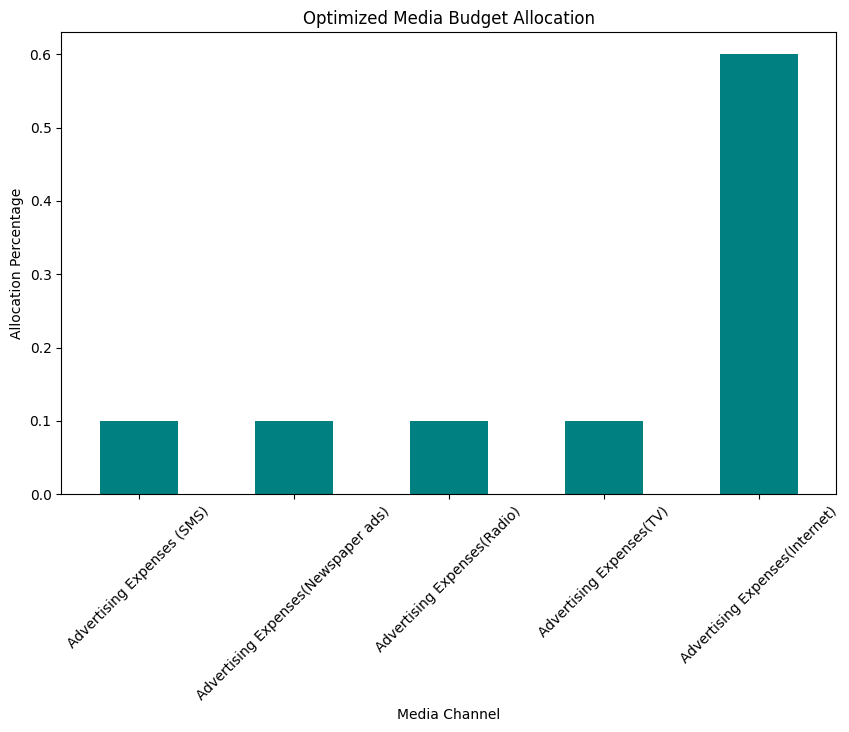

In [60]:
# Plot optimized media budget allocation
plt.figure(figsize=(10, 6))
optimized_spends.plot(kind='bar', color='teal')
plt.title('Optimized Media Budget Allocation')
plt.ylabel('Allocation Percentage')
plt.xlabel('Media Channel')
plt.xticks(rotation=45)
plt.show()

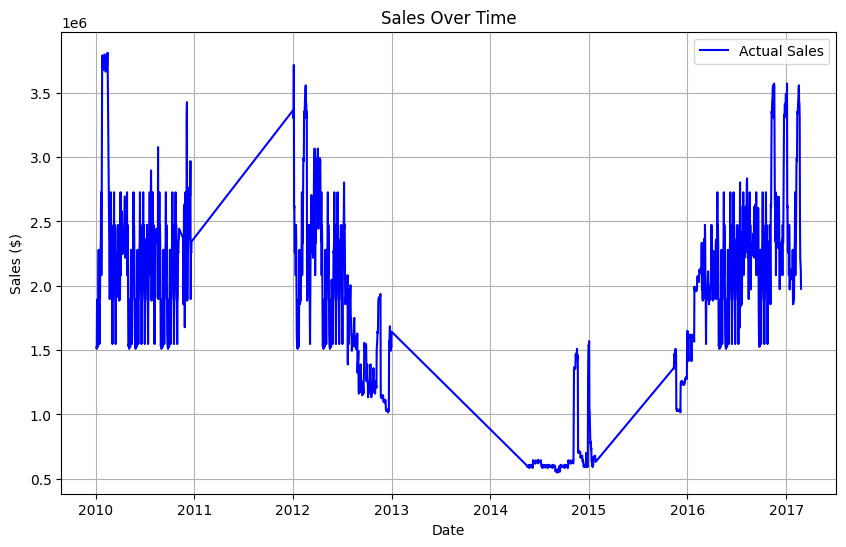

In [61]:
# Plot sales over time
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['SALES ($)'], color='blue', label='Actual Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.show()

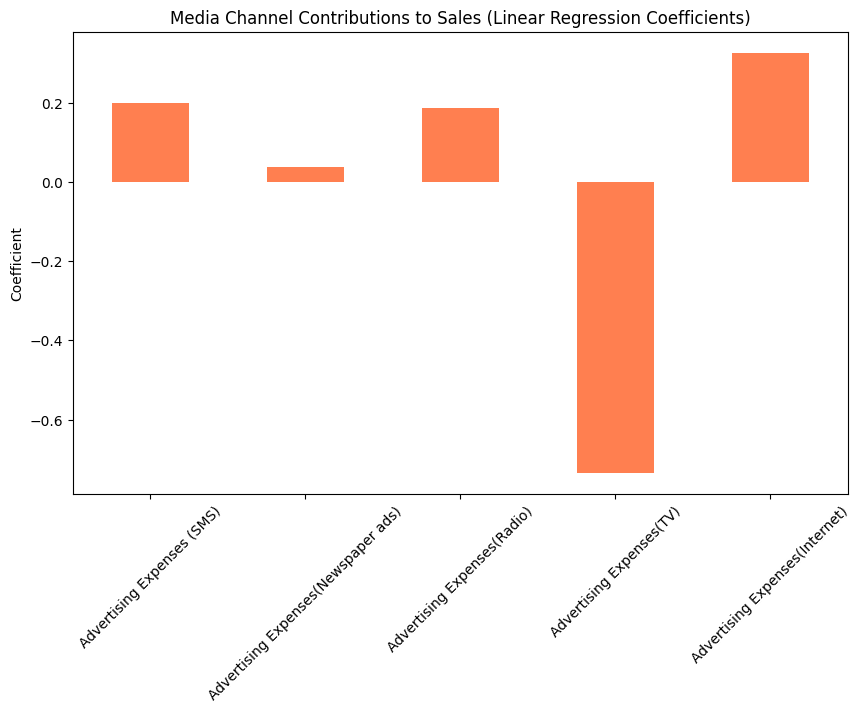

In [62]:
# Plot channel contributions (linear regression coefficients)
plt.figure(figsize=(10, 6))
coefficients[media_spends_cols].plot(kind='bar', color='coral')
plt.title('Media Channel Contributions to Sales (Linear Regression Coefficients)')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

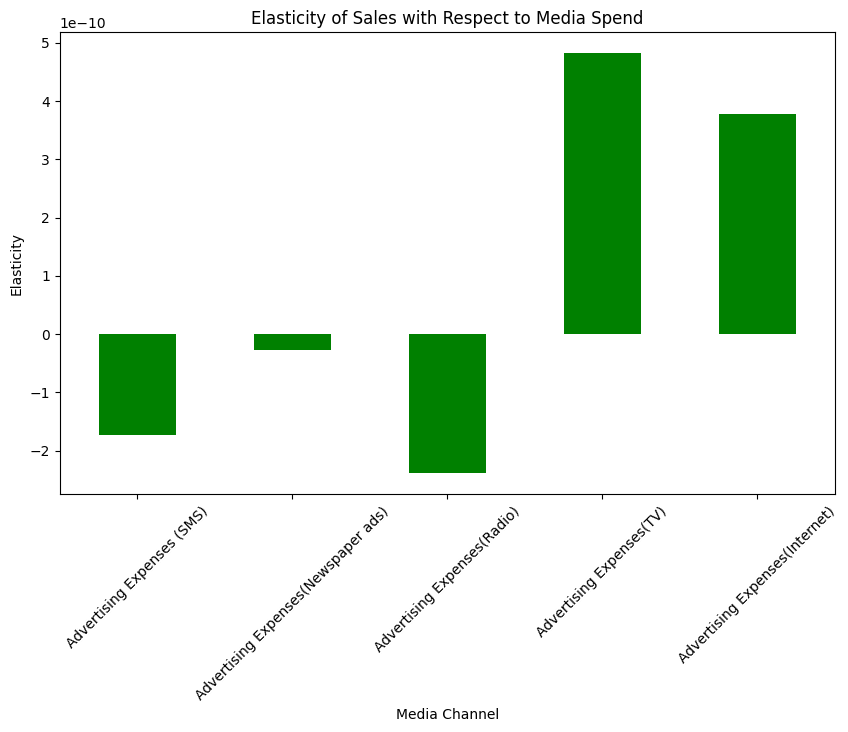

In [63]:
# Plot elasticities for each media channel
plt.figure(figsize=(10, 6))
elasticity.plot(kind='bar', color='green')
plt.title('Elasticity of Sales with Respect to Media Spend')
plt.ylabel('Elasticity')
plt.xlabel('Media Channel')
plt.xticks(rotation=45)
plt.show()